In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#boston data
boston_cal_df = pd.read_csv('data/boston-airbnb-open-data/calendar.csv',parse_dates=True)
boston_listings_df = pd.read_csv('data/boston-airbnb-open-data/listings.csv',parse_dates=True)
boston_reviews_df = pd.read_csv('data/boston-airbnb-open-data/reviews.csv')


#Convert the date column to a date time type
boston_cal_df['new_date'] = pd.to_datetime(boston_cal_df['date'],format = '%Y-%m-%d').dt.date

boston_cal_df = boston_cal_df.drop('date', axis = 1)

#Remove $ from strings

boston_cal_df['price'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')
boston_cal_df['price'].replace(regex=True,inplace=True,to_replace=r'\,',value=r'')

#convert price column to a float type
boston_cal_df['new_price'] = pd.to_numeric(boston_cal_df['price'])

boston_cal_df = boston_cal_df.drop('price', axis = 1)


In [3]:
#Seattle Data

seattle_cal_df = pd.read_csv('data/seattle/calendar.csv',parse_dates=True)
seattle_listings_df = pd.read_csv('data/seattle/listings.csv',parse_dates=True)
seattle_reviews_df = pd.read_csv('data/seattle/reviews.csv')

#Convert the date column to a date time type
seattle_cal_df['new_date'] = pd.to_datetime(seattle_cal_df['date'],format = '%Y-%m-%d').dt.date

seattle_cal_df = seattle_cal_df.drop('date', axis = 1)

#Remove $ from strings

seattle_cal_df['price'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')
seattle_cal_df['price'].replace(regex=True,inplace=True,to_replace=r'\,',value=r'')

#convert price column to a float type
seattle_cal_df['new_price'] = pd.to_numeric(seattle_cal_df['price'])

seattle_cal_df = seattle_cal_df.drop('price', axis = 1)

# Price v Time

In [11]:
date_price_Boston_df = boston_cal_df[[
    'new_date',
    'new_price']].groupby([
    'new_date']).mean().reset_index(level=['new_date'])

date_price_Boston_df['days'] = (date_price_Boston_df['new_date'] - min(date_price_Boston_df['new_date'])).dt.days

In [12]:
date_price_Seattle_df = seattle_cal_df[[
    'new_date',
    'new_price']].groupby([
    'new_date']).mean().reset_index(level=['new_date'])

date_price_Seattle_df['days'] = (date_price_Seattle_df['new_date'] - min(date_price_Seattle_df['new_date'])).dt.days

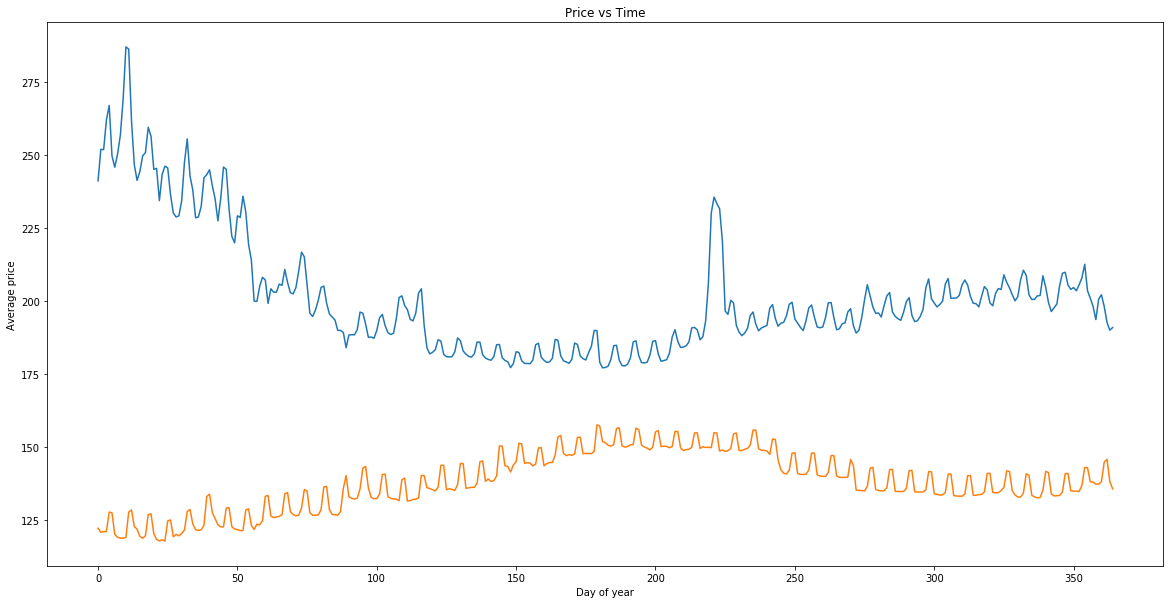

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='days', y='new_price', data=date_price_Boston_df)
sns.lineplot(x='days', y='new_price', data=date_price_Seattle_df)
ax.set(xlabel='Day of year', ylabel='Average price')
plt.title('Price vs Time')
#ax.set(xlim = (, ))
plt.show();

In [14]:
fig.savefig('price_time.png')